**Chapter 3 – Classification**

_This notebook contains all the sample code and solutions to the exercises in chapter 3._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# MNIST

**Warning**: `fetch_mldata()` is deprecated since Scikit-Learn 0.20. You should use `fetch_openml()` instead. However, it returns the unsorted MNIST dataset, whereas `fetch_mldata()` returned the dataset sorted by target (the training set and the test test were sorted separately). In general, this is fine, but if you want to get the exact same results as before, you need to sort the dataset using the following function:

MNISTデータセットは、はじめから訓練セット（最初の60000枚）とテストセット（後ろの10000枚）に分かれて格納されている

In [2]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [3]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [4]:
mnist.data.shape #70000サンプル、28*28=784サンプル

(70000, 784)

In [5]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
28*28

784

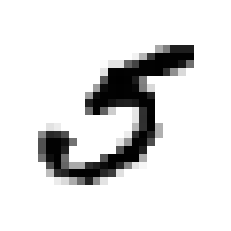

In [8]:
some_digit = X[36000] #36000番目のサンプルを見てみる
some_digit_image = some_digit.reshape(28, 28)  #元の画像が28*28ピクセル
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
# interpolation = ‘nearest'...表示解像度が画像の解像度と同じではないときピクセル間を補間せずに単純に画像を表示する。
# 結果、ピクセルが複数のピクセルの正方形として表示される画像になる。

plt.axis("off") #枠と目盛りを消去

#save_fig("some_digit_plot")
plt.show()

In [9]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [10]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options): #表示する画像を整形するための関数
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

np.r_
- 配列を結合可能
- [ ]の中に結合したい配列や結合の仕方について指定可能
- 特に何も指定しない場合はhstackと同様の使用可能
- スライス表記によって1次元配列を作ることも可能

<br/>
スライス表記による一次元配列の作成<br/>
[start:stop:step]

In [11]:
import numpy as np
np.r_[0:10:10j]

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [12]:
X[:12000:600]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
X[13000:30600:600]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
X[30600:60000:590]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

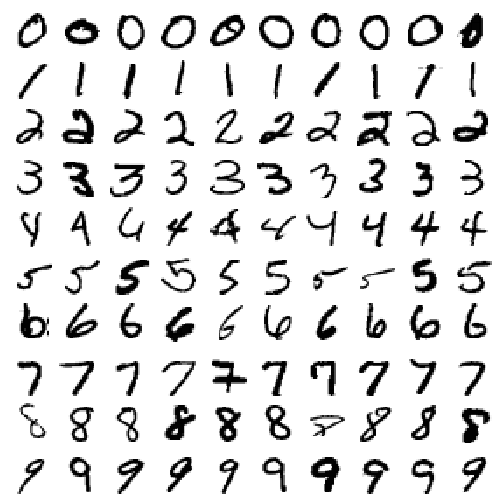

In [15]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]] #????
plot_digits(example_images, images_per_row=10) #直前に作った関数
#save_fig("more_digits_plot")
plt.show()

In [16]:
y[36000] #36000番目のサンプル  = 5

5

In [17]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# MNISTデータセットは、はじめから訓練セット（最初の60000枚）とテストセット（後ろの10000枚）に分かれて格納されている

In [18]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

numpyにはshuffle(x)とpermutation(x)というほぼ同じ機能の関数があります．<br/>
どちらも，配列をランダムに並び替えますが，違いが2つあります．<br/><br/>

ひとつは，shuffle(x)は配列をin-placeで並び替えるが，permutation(x)は並び替えた配列のコピーを生成すること、<br/>
もうひとつの違いは，permutation(x)には配列だけでなくint型整数も渡せるという点です．<br/>
permutation(5)は，permutation(list(range(5)))と同じ働きをします．(permutation(arange(5))でも同じです．)

# Binary classifier

In [19]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

**Note**: a few hyperparameters will have a different default value in future versions of Scikit-Learn, so a warning is issued if you do not set them explicitly. This is why we set `max_iter=5` and `tol=-np.infty`, to get the same results as in the book, while avoiding the warnings.

In [20]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

### SGDClassifier

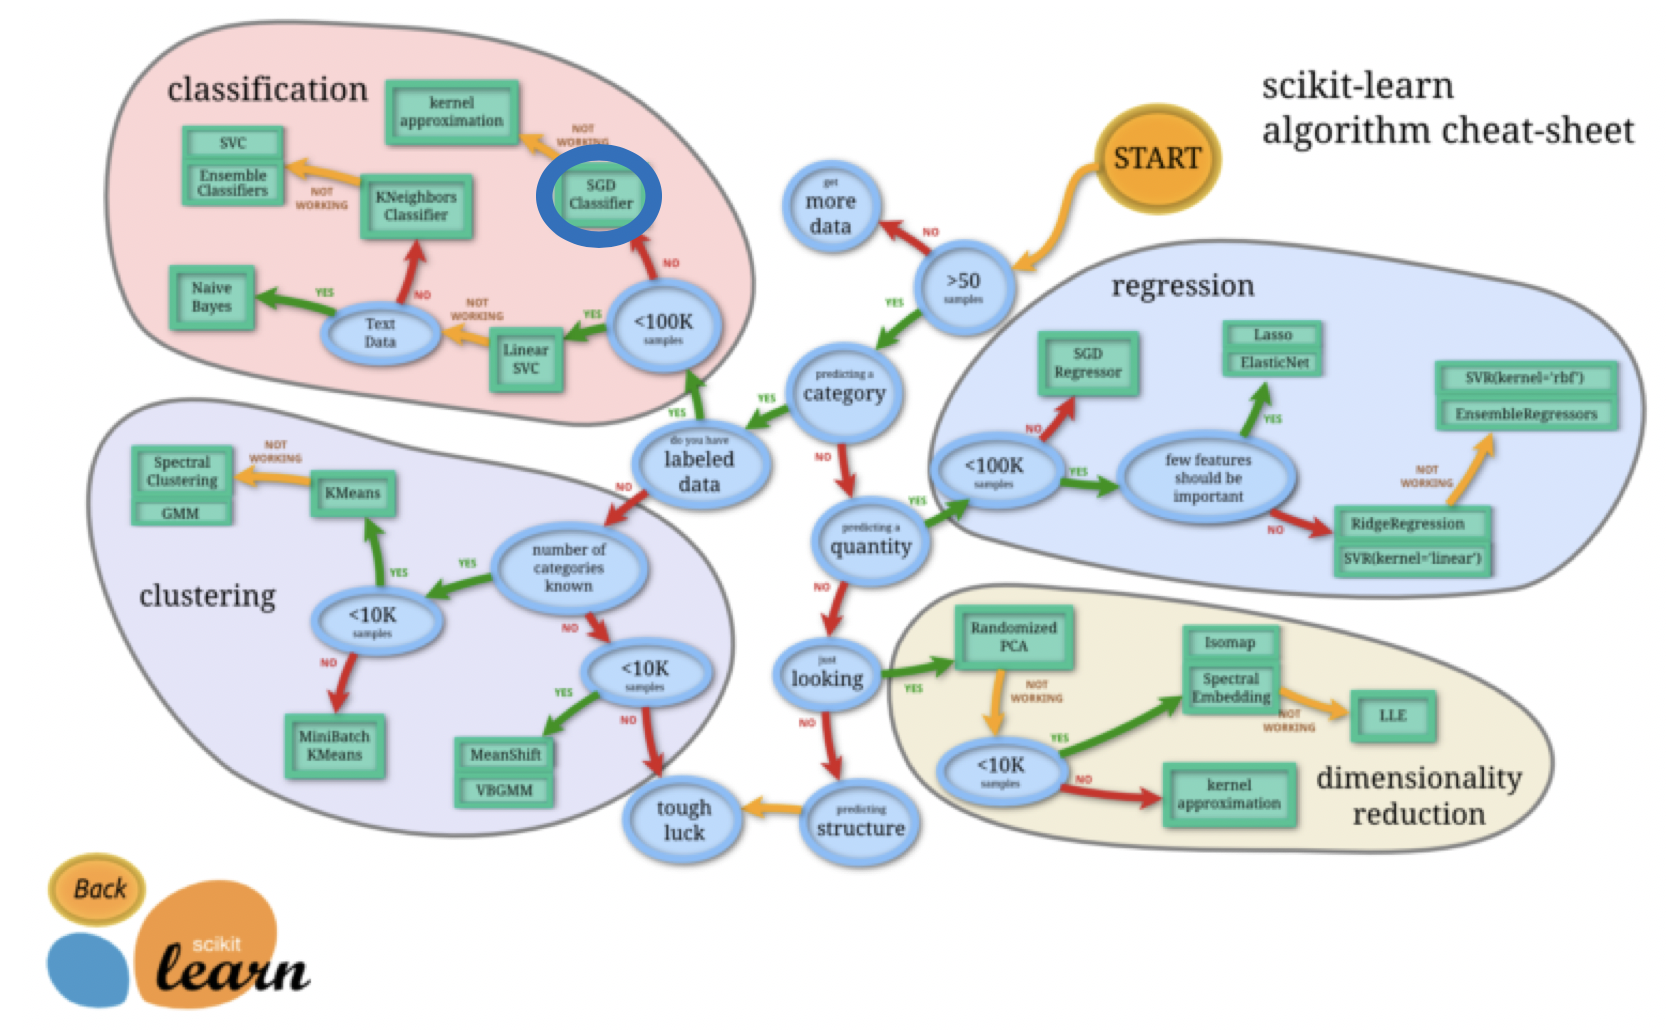

In [21]:
from IPython.display import display
from PIL import Image
display(Image.open("20190827153955.png" ))

- パラメータの学習にSGDを使った分類器学習
- online learning ( <-> batch learning)
- 特定のクラスに対応する超平面までの距離が返されると、確率は次のように計算されます。
  clip(decision_function(X), -1, 1) + 1)/2
- 活用例）市場の動向やトレンドを捕捉したり、購入情報から関連のある商品を提示するリコメンド機能

#### SGD
- stochastic gradient descent　＝確率的勾配降下法
- 一件のデータに対して、損失関数を計算してその値を微分したものでweightの値を更新する最適化手法
- Qiをループごとにシャッフルして、シャッフルしたQiに対して$w:=w−η∇Qi(w)$とアップデートしながら反復する
 - η...学習率、収束の有無や発散を決める最重要パラメーター
- 「最急降下法では、局所解から逃げることはできないが、確率的勾配降下法は乱数の挙動のおかげで局所解から脱出することができる」
- 最小二乗法の応用 = 確率的勾配降下法、最急降下法

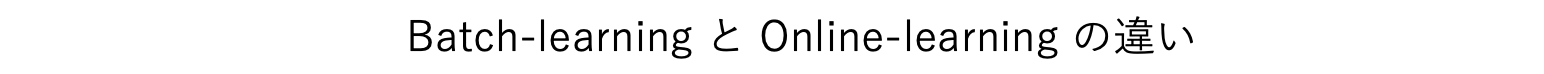

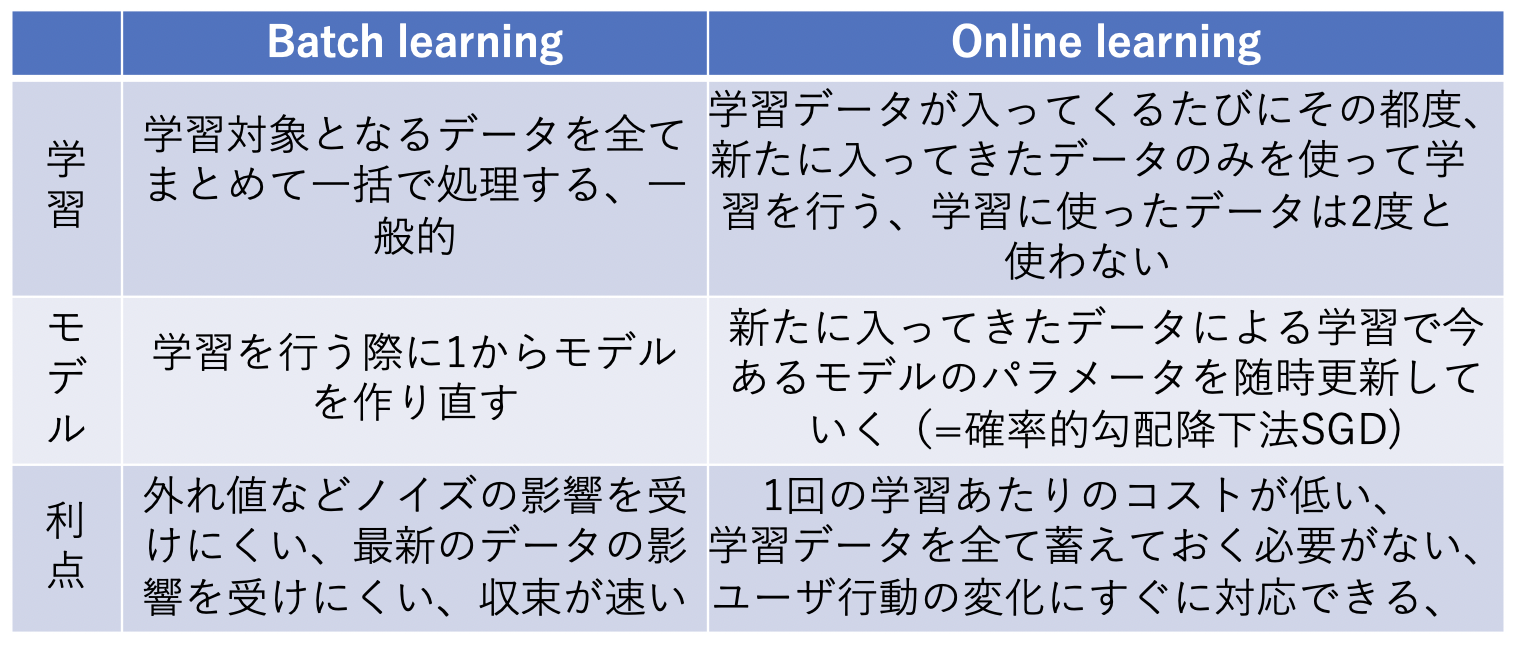

In [22]:
display(Image.open("20190828132803.png" ))
display(Image.open("20190827160656.png"))

In [23]:
sgd_clf.predict([some_digit])

array([ True])

In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96225, 0.9645 , 0.94765])

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.96225
0.9645
0.94765


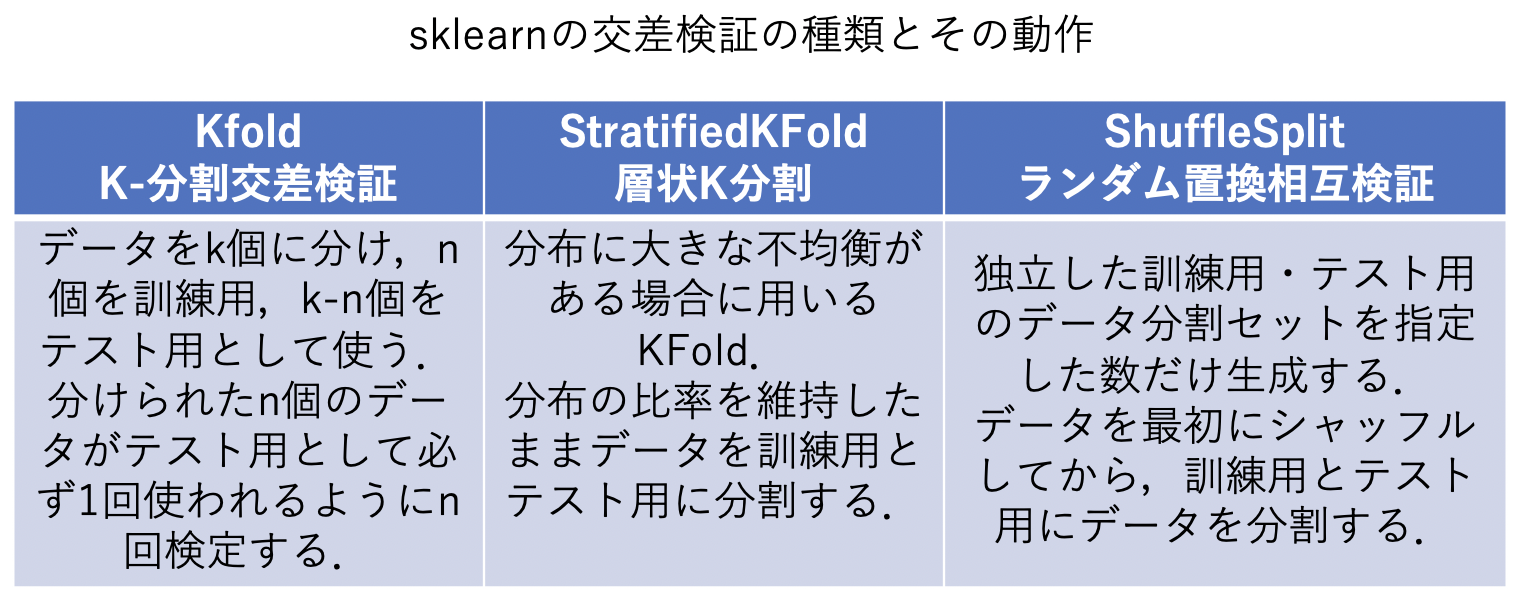

In [26]:
display(Image.open("20190827162139.png"))

In [27]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

sklearn.base.BaseEstimator ~を実装している理由👇<br/>
- scikit-learnに準拠した学習器を自分で実装してscikit-learnに実装されているgrid searchとかcross validationを使えるようにするため。
- 機械学習で色々やっていると、いろいろなモデルを複合したアンサンブルモデルなど、自分で新しい予測モデルを作りたい場合がある。 その場合自分でいちから作り上げるのではなく、scikit-learn の定義にしたがってモデルを定義すれば、scikit-learn のパラメータ最適化モジュールである GridSearch や RandomSearch を利用することができ効率的である。

#### scikit-learn準拠にする方法
1. sklearn.base.BaseEstimatorを継承する
2. 回帰ならRegressorMixinを（多重）継承する
3. 分類ならClassifierMixinを（多重）継承する
4. fitメソッドを実装する
 - 学習データとラベルを受け取って学習したパラメータをフィールドにセットする
 - initでパラメータをいじる操作を入れるとgrid searchが動かなくなる（後述）
5. predictメソッドを実装する
 - テストデータを受け取ってラベルのリストを返す

In [28]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.909  , 0.90715, 0.9128 ])

In [29]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [30]:
# 機械学習を用いたクラス分類の精度を評価するには、混同行列 Confusion matrixを作成して、
# 正しく識別できた件数、誤って識別した件数を比較することが一般的

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53417,  1162],
       [ 1350,  4071]])

In [31]:
y_train_perfect_predictions = y_train_5

In [32]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

<br/>

適合度、適合率、精度 (Precision)
- ポジティブに分類されたアイテムのうち、実際にポジティブであったアイテムの割合
- 陽性判定の信憑性を表す
- Precision = TP / (TP + FP)

<br/>

検出率 (Recall) 
- 本来ポジティブに分類すべきアイテムを、正しくポジティブに分類できたアイテムの割合
- 問題 (疾患) のあるものを見逃さない割合
- 真陽性率 (TPR, True-Positive Rate) または、感度 (Sensitivity) とも呼ばれる
- Recall = TPR = Sensitivity = TP / (TP + FN)

In [33]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.7779476399770686

In [34]:
4344 / (4344 + 1307) # = precision_score(y_train_5, y_train_pred)

0.7687135020350381

In [35]:
recall_score(y_train_5, y_train_pred)

0.7509684560044272

In [36]:
4344 / (4344 + 1077) # = recall_score(y_train_5, y_train_pred)

0.801328168234643

F 値 (F-measure, F-score, F1 Score)
- 精度 (Precision) と検出率 (Recall) をバランス良く持ち合わせているかを示す指標
- 検出精度 (Precision) と、検出率 (Recall) の調和平均で求められ、0 〜 1 の間の数値で出力され、0 の場合最も悪い評価、1 の場合最も良い評価となる
- F1 = 2 * (precision * recall) / (precision + recall)

In [37]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7642200112633752

In [38]:
4344 / (4344 + (1077 + 1307)/2) # = f1_score(y_train_5, y_train_pred)

0.7846820809248555

In [39]:
# decision_function...Predict confidence scores for samples.
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([150526.40944343])

In [40]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [41]:
y_some_digit_pred

array([ True])

In [42]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [43]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

Note: there was an [issue](https://github.com/scikit-learn/scikit-learn/issues/9589) in Scikit-Learn 0.19.0 (fixed in 0.19.1) where the result of `cross_val_predict()` was incorrect in the binary classification case when using `method="decision_function"`, as in the code above. The resulting array had an extra first dimension full of 0s. Just in case you are using 0.19.0, we need to add this small hack to work around this issue:

In [44]:
y_scores.shape

(60000,)

In [45]:
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [46]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

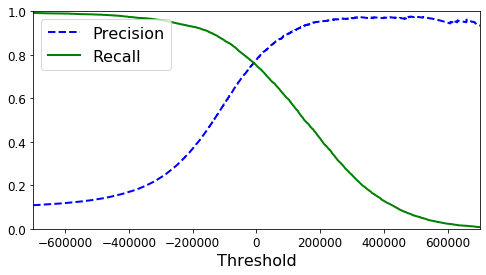

In [47]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
#save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [48]:
(y_train_pred == (y_scores > 0)).all()

True

In [49]:
y_train_pred_90 = (y_scores > 70000)

In [50]:
precision_score(y_train_5, y_train_pred_90)

0.8712083540527101

In [51]:
recall_score(y_train_5, y_train_pred_90)

0.6463752075262866

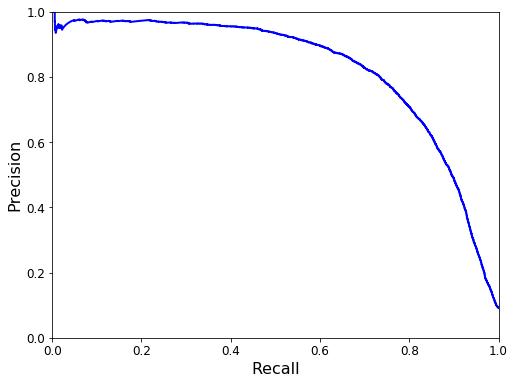

In [52]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
#save_fig("precision_vs_recall_plot")
plt.show()

# ROC curves

#### ROC(Receiver Operating Characteristic)
- 第2次大戦のときに米国のレーダーの研究から生まれた信号処理の概念...雑音の中から敵機の存在を検出するための方法として開発された
- 観測された信号からあるものの存在を判定する際の基準となる特性
- 受信者操作特性あるいは受信者動作特性などと訳される（医療方面では受信が受診と書かれることもある）

#### ROC curves
- 横軸に偽陽性率、縦軸に敏感度をプロットし、カットオフポイントを媒介変数として大から小へと変化させることで描かれる曲線
- 検査が有効であれば、この曲線は45度の線から左上に離れる。離れれば離れる程、検査として有効である。

In [53]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

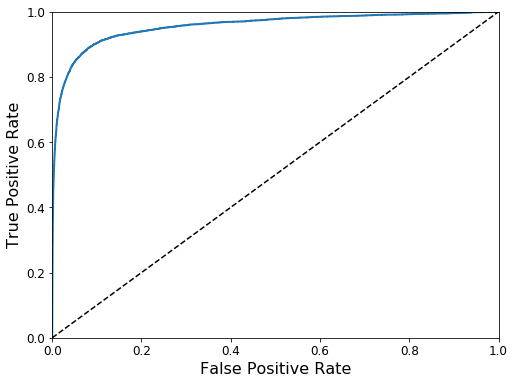

In [54]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.show()

#### AUC (Area under the curve)
- ROC曲線下の面積
- 分類器（分類のアルゴリズム）の性能の良さを表す
- 0から1までの値をとり，完全な分類が可能なときの面積は1で，ランダムな分類の場合は0.5になる
- TとFからランダムに1個ずつ選んだとき，Tの値がFの値以上になる確率です

In [55]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9562435587387078

**Note**: we set `n_estimators=10` to avoid a warning about the fact that its default value will be set to 100 in Scikit-Learn 0.22.

In [56]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [57]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

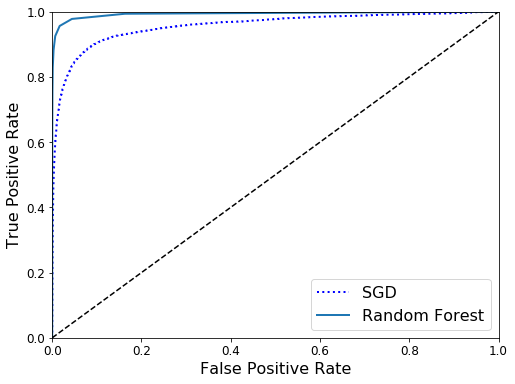

In [58]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

In [59]:
roc_auc_score(y_train_5, y_scores_forest)

0.9931243366003829

In [60]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9852973447443494

In [61]:
recall_score(y_train_5, y_train_pred_forest)

0.8282604685482383

# Multiclass classification

二類分類器でも、複数使うことで多クラス分類を行うことができる

- OVA法one-versus-all...個々の分類器の決定スコアを比較し、もっとも高いスコアを出力した分類器のクラスを選ぶ。大半の二項分類アルゴリズムはOVAのほうがいい
- OVO法one-versus-one...数字のすべてのペアに対して二項分類器を訓練する

In [62]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5], dtype=int8)

In [63]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-152619.46799791, -441052.22074349, -249930.3138537 ,
        -237258.35168498, -447251.81933158,  120565.05820991,
        -834139.15404835, -188142.48490477, -555223.79499145,
        -536978.92518594]])

In [64]:
#argument of the maximum = 最大値を与える引数あるいは最大点集合 = 関数がその最大値をとる定義域の元全体の成す集合
np.argmax(some_digit_scores)  #最高スコアは5のスコア

5

In [65]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [66]:
sgd_clf.classes_[5]

5

In [67]:
# scikit-learnに強制的にOVOやOVAを使わせたいときにONeVsRestClassifierあるいはOneVsOneClassifierを使う
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5], dtype=int8)

In [68]:
len(ovo_clf.estimators_)

45

In [69]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=int8)

In [70]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [71]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.84993001, 0.81769088, 0.84707706])

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.91211758, 0.9099955 , 0.90643597])